<a href="https://colab.research.google.com/github/SaidTheCoder/p117/blob/main/p117ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving challenge117.csv to challenge117.csv


In [2]:
import csv
import pandas as pd

df=pd.read_csv("challenge117.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [5]:
from sklearn.model_selection import train_test_split
y=df["class"]
x=df[["variance","skewness","curtosis","entropy"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_prediction=lr.predict(x_test)
predicted_values=[]
for i in y_prediction:
  if i==0:
    predicted_values.append("AUTHORISED")

  else:
    predicted_values.append("FORGED")

actual_values=[]
for i in y_test.ravel():
  if i==0:
    actual_values.append("AUTHORISED")

  else:
    actual_values.append("FORGED")


[Text(0, 0.5, 'FORGED'), Text(0, 1.5, 'AUTHORISED')]

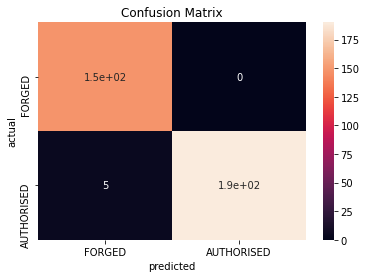

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
labels=["FORGED","AUTHORISED"]
cm=confusion_matrix(actual_values,predicted_values,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)

In [10]:
tn,fp,fn,tp=confusion_matrix(y_test,y_prediction).ravel()
print("true positives =>",tp)
print("true negitives =>",tn)
print("false positives=>",fp)
print("false negitives=>",fn)

true positives => 148
true negitives => 190
false positives=> 5
false negitives=> 0


In [11]:
accuracy=(tn+tp)*100/(tp+tn+fp+fn)
print("the accuracy is =>",accuracy)

the accuracy is => 98.54227405247813
